In [103]:
import random
from scipy.spatial import Delaunay, ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

In [ ]:
def in_hull(p,hull):
    #https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl/16898636#16898636
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)
    
    return hull.find_simplex(p)>=0

In [108]:
cells  = np.random.rand(10,3)
bm_cells = np.random.rand(10,3)
hull = Delaunay(cells)
result = in_hull(bm_cells, hull)
printtitle=(result.tolist())

In [109]:
#2d plotting procedure

# plt.plot(cells[:,0], cells[:,1], 'bo')
# plt.plot(bm_cells[:,0], bm_cells[:,1], 'ro')

# hull2 = ConvexHull(cells)  
# for simplex in hull2.simplices:
#     plt.plot(cells[simplex, 0], cells[simplex, 1], 'b-')
    
# n = [0,1,2,3,4,5,6,7,8,9]

# for i, txt in enumerate(n):
#     plt.annotate(txt, (cells[i,0], cells[i,1]), size=16, color = 'b')
#     plt.annotate(txt, (bm_cells[i,0], bm_cells[i,1]), size = 16, color = 'r')
# plt.title(title)   
# plt.savefig("ConvexHull_2")

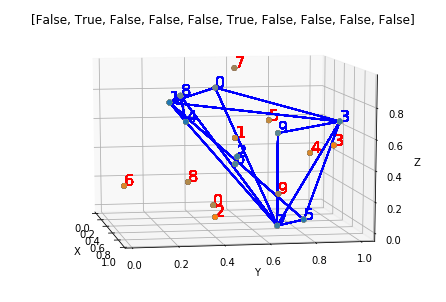

In [110]:
xcells=cells[:,0]
ycells=cells[:,1]
zcells = cells[:,2]
xbm=bm_cells[:,0]
ybm=bm_cells[:,1]
zbm = bm_cells[:,2]

hull2 = ConvexHull(cells)  
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(printtitle)
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    ax.scatter(xcells, ycells, zcells, 'r')
    ax.scatter(xbm,ybm,zbm, 'b')

    for simplex in hull2.simplices:
        plt.plot(cells[simplex, 0], cells[simplex, 1], cells[simplex,2], 'b-')
        #plt.fill(cells[hull.vertices,0], cells[hull.vertices,1], cells[hull.vertices,2], 'k', alpha=0.3)

    for i in range(10): #plot each point + it's index as text above
        ax.text(cells[i,0],cells[i,1],cells[i,2],  '%s' % (str(i)), size=16, zorder=1, color='b') 
        ax.text(bm_cells[i,0],bm_cells[i,1],bm_cells[i,2],  '%s' % (str(i)), size=16, zorder=1, color='r')  

    #ax.set_title("{}, view = {}".format(printtitle,ii), pad=10)
    plt.savefig("{}".format(ii))


In [111]:
filenames= ["{}.png".format(10*i) for i in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output3.gif', images, fps=5)